# Πάει Μακριά η Βαλίτσα;

* Εμπνευσμένο από το κεφάλαιο 2 του βιβλίου του Cyrille Rossant, Learning IPython for Interactive Computing and Data Visualization, 2η έκδοση, Packt Publishing, 2015.

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Αρχίζουμε διαβάζοντας τα δεδομένα.

In [3]:
data_filename = 'nyc_taxi/nyc_data.csv'
data = pd.read_csv(data_filename)

* Έχουμε δει πώς να πάρουμε μια γενική εικόνα των τιμών ενός `DataFrame`  μέσω της μεθόδου `describe()`.

* Μπορούμε να διερευνήσουμε και τις τιμές συγκεκριμένης στήλης, καλώντας τις κατάλληλες μεθόδους στο αντικείμενο `Series`.

In [4]:
data['trip_distance'].count(), data['trip_distance'].min(), data['trip_distance'].max()

(846945, 0.0, 6005123.0)

In [5]:
data['trip_distance'].describe()

count    8.469450e+05
mean     9.958211e+00
std      6.525205e+03
min      0.000000e+00
25%      1.050000e+00
50%      1.800000e+00
75%      3.200000e+00
max      6.005123e+06
Name: trip_distance, dtype: float64

* Ή ακόμα:

In [6]:
data['trip_distance'].mean(), data['trip_distance'].median(), data['trip_distance'].std()

(9.958211076280044, 1.8, 6525.204888168032)

* Αν η μέση απόσταση είναι περίπου 3,5 μίλια και η διάμεσος είναι 1,8 μίλια, ποια είναι η τυπική, δηλαδή η πιο συνηθισμένη απόσταση μιας διαδρομής;

In [7]:
data['trip_distance'].mode()

0    1.0
Name: trip_distance, dtype: float64

* Και ποιες είναι οι δέκα πιο συνηθισμένες αποστάσεις;

* Η μέθοδος`value_counts()` μετράει κάθε διαφορετική τιμή και τις παραθέτει σε φθίνουσα σειρά.

* Αν θέλαμε αύξουσα σειρά, θα περνάγαμε την παράμετρο `ascending=True`.

In [8]:
data['trip_distance'].value_counts()

1.00     21815
0.90     18915
0.80     18449
1.10     18263
1.20     17823
         ...  
28.21        1
41.80        1
26.96        1
24.29        1
31.08        1
Name: trip_distance, Length: 2648, dtype: int64

* Όπως βλέπουμε, υπάρχουν χιλιάδες διαφορετικές τιμές. 

* Έστω ότι θέλουμε να πάρουμε τις δέκα πιο συνηθισμένες.

* Μπορούμε να δοκιμάσουμε με το συνηθισμένο συντακτικό της Python.

In [9]:
data['trip_distance'].value_counts()[:10]

1.00     21815
0.90     18915
0.80     18449
1.10     18263
1.20     17823
         ...  
7.30       624
2.73       622
2.74       616
2.75       614
10.00      612
Name: trip_distance, Length: 288, dtype: int64

* Το αποτέλεσμα δεν είναι αυτό που περιμέναμε.

* Ο λόγος είναι ότι μας επιστρέφει τις τιμές μέχρι να βρει τη γραμμή με *ετικέτα* (label) ίση με 10.

* Εμείς όμως θέλουμε απλώς τις πρώτες 10 στη σειρά, με βάση τη θέση τους.

* Για να επιλέξουμε γραμμές με βάση τη θέση τους χρησιμοποιούμε το `iloc[]`.

In [10]:
data['trip_distance'].value_counts().iloc[:10]

1.0    21815
0.9    18915
0.8    18449
1.1    18263
1.2    17823
0.7    17155
1.3    16779
1.4    16021
1.5    15070
0.6    14769
Name: trip_distance, dtype: int64

* Το συμμετρικό του `iloc[]` για επιλογή με βάση την ετικέτα είναι το `loc[]` (που όπως είδαμε δεν βγάζει το αποτέλεσμα που θέλουμε στην περίπτωσή μας).

In [11]:
data['trip_distance'].value_counts().loc[:10]

1.00     21815
0.90     18915
0.80     18449
1.10     18263
1.20     17823
         ...  
7.30       624
2.73       622
2.74       616
2.75       614
10.00      612
Name: trip_distance, Length: 288, dtype: int64

* Ας φτιάξουμε ένα διάγραμμα για να δούμε τις αποστάσεις.

* Το διάγραμμα θα είναι ένα ιστόγραμμα (histogram).

* Αυτό μπορούμε να το φτιάξουμε κατ' ευθείαν μέσα από το pandas.

<AxesSubplot:>

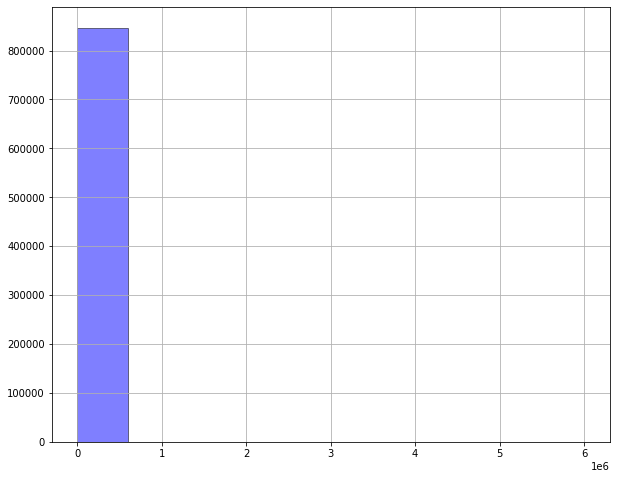

In [12]:
data.trip_distance.hist(color='blue', edgecolor='black', alpha=0.5, figsize=(10, 8))

* Το αποτέλεσμα δεν είναι μάλλον αυτό που θέλαμε.

* Ο λόγος είναι ότι υπάρχουν διαδρομές με έκτοπες τιμές (outliers), όπως 950.000 μίλια.

* Μάλλον έχει νόημα να περιορίσουμε το ιστόγραμμα στις διαδρομές από 0 έως 10 μίλια.

* Για να το κάνουμε αυτό, θα πρέπει να ορίσουμε εμείς τους κουβάδες στους οποίους θέλουμε να συλλέξουμε τα δεδομένα στο ιστόγραμμα.

* Θα βρούμε 100 τιμές, με τη συνάρτηση `linspace()` της NumPy, για να διαμερίσουμε τα δεδομένα με διαδρομές από 0 έως και 10 μίλια.

In [13]:
np.linspace(0, 10, 100)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

<AxesSubplot:>

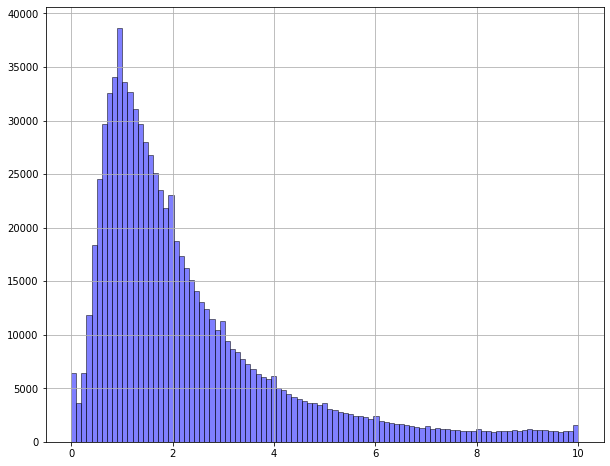

In [14]:
data.trip_distance.hist(bins=np.linspace(0, 10, 100), 
                        color='blue', edgecolor='black', 
                        alpha=0.5, figsize=(10, 8))

* Παρατηρούμε ότι στο ιστόγραμμα υπάρχουν κάποια τοπικά μέγιστα (κορυφές).

* Για να το διερευνήσουμε αυτό.

* Ας μετρήσουμε πόσες διαδρομές μετρήθηκαν σε κάθε κουβά (με μία μικρή διαφορά που εδώ δεν μας πειράζει, στο ιστόγραμμα οι κουβάδες είναι δεξιά κλειστοί-αριστερά ανοιχτοί, ενώ εδώ αντίστροφα).

In [17]:
data['trip_distance'].value_counts(bins=np.linspace(0, 10, 100), ascending=False)

(0.909, 1.01]     38674
(0.808, 0.909]    34089
(1.01, 1.111]     33621
(1.111, 1.212]    32640
(0.707, 0.808]    32540
                  ...  
(9.798, 9.899]      999
(7.879, 7.98]       998
(9.697, 9.798]      980
(9.596, 9.697]      957
(8.283, 8.384]      938
Name: trip_distance, Length: 99, dtype: int64

* Για να εντοπίσουμε τις κορυφές, πρέπει να συγκρίνουμε τον αριθμό των διαδρομών σε κάθε κουβά με τους αντίστοιχους αριθμούς στους γειτονικούς κουβάδες.

* Αυτή τη στιγμή έχουμε τους αριθμούς ταξινομημένους με βάση το πλήθος των διαδρομών.

* Θα πρέπει να τους ταξινομήσουμε με βάση τον κουβά, δηλαδή την ετικέτα της κάθε γραμμής του αποτελέσματος της  `value_counts()`.

* Ουσιαστικά δηλαδή θέλουμε να ταξινομήσουμε με βάση το ευρετήριο του αποτελέσματος της `value_couns()`.

In [18]:
trip_distance_counts = data['trip_distance'].value_counts(bins=np.linspace(0, 10, 100)).sort_index()
trip_distance_counts

(-0.001, 0.101]     6392
(0.101, 0.202]      3620
(0.202, 0.303]      6394
(0.303, 0.404]     11829
(0.404, 0.505]     18405
                   ...  
(9.495, 9.596]      1043
(9.596, 9.697]       957
(9.697, 9.798]       980
(9.798, 9.899]       999
(9.899, 10.0]       1589
Name: trip_distance, Length: 99, dtype: int64

* Αφού λοιπόν έχουμε τις μετρήσεις ανά κουβά, με τη σειρά από τον πρώτο κουβά (0 έως 0,10 μίλια) μέχρι τον τελευταίο (9,90 έως 10 μίλια), μπορούμε να βρούμε τις κορυφές συγκρίνοντας τους γείτονες.

* Για το σκοπό αυτό μπορούμε να χρησιμοποιήσουμε τη συνάρτηση `find_peaks()` της βιβλιοθήκης [SciPy](https://scipy.org/).

* Η συνάρτηση μας επιστρέφει τη θέση των κορυφών και τυχόν επιπλέον τυχόν χαρακτηριστικά που μπορεί να έχουμε ζητήσει (και εμείς τώρα αγνοούμε).

In [20]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(trip_distance_counts)
peaks

array([ 9, 19, 29, 39, 49, 56, 59, 69, 71, 79, 81, 83, 86, 89, 94],
      dtype=int64)

* Πλέον μπορούμε να βρούμε τους κουβάδες που αντιστοιχούν στις κορυφές. 

* Θα χρησιμοποιήσουμε το `iloc[]` ώστε να εξάγουμε τις γραμμές στις θέσεις των κορυφών.

In [21]:
trip_distance_counts.iloc[peaks]

(0.909, 1.01]     38674
(1.919, 2.02]     23070
(2.929, 3.03]     11247
(3.939, 4.04]      6128
(4.949, 5.051]     3623
(5.657, 5.758]     2402
(5.96, 6.061]      2366
(6.97, 7.071]      1464
(7.172, 7.273]     1285
(7.98, 8.081]      1209
(8.182, 8.283]     1034
(8.384, 8.485]     1013
(8.687, 8.788]     1063
(8.99, 9.091]      1210
(9.495, 9.596]     1043
Name: trip_distance, dtype: int64

* Οι περισσότερες κορυφές λοιπόν αντιστοιχούν σε διαδρομές με στρογγυλή απόσταση (1, 2, ..., 8 μίλια).

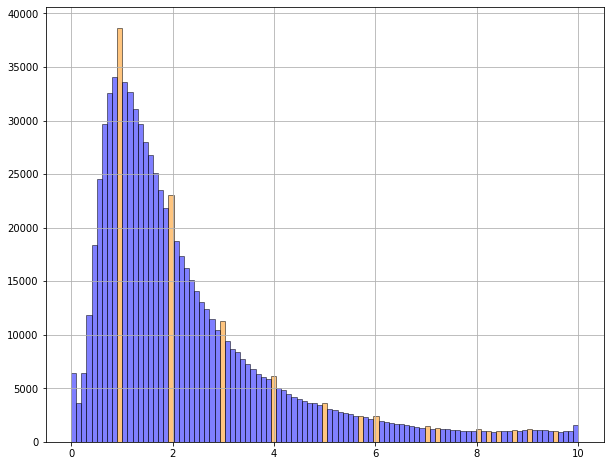

In [22]:
ax = data.trip_distance.hist(bins=np.linspace(0, 10, 100), 
                             color='blue', edgecolor='black', 
                             alpha=0.5, figsize=(10, 8))
for i in peaks:
    ax.patches[i].set_facecolor('darkorange')